In [18]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator

In [19]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

In [20]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
train_it = train_datagen.flow_from_directory(r'C:\Users\Gianl\OneDrive\Documenti\progetto Deep learning\COVID-19 Radiography Database\train',
                                     target_size=(256, 256),
                                     batch_size=32,
                                     color_mode="rgb",
                                     class_mode="categorical",
                                     shuffle=True,
                                     seed=42)
# load and iterate test dataset
test_it = test_datagen.flow_from_directory(r'C:\Users\Gianl\OneDrive\Documenti\progetto Deep learning\COVID-19 Radiography Database\test', 
                                    target_size=(256, 256),
                                     batch_size=32,
                                     color_mode="rgb",
                                     class_mode="categorical",
                                     shuffle=True,
                                     seed=42)

Found 492 images belonging to 3 classes.
Found 123 images belonging to 3 classes.


In [22]:
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(40, 256, 256, 3), min=0.000, max=1.000


In [23]:
from keras.utils import to_categorical
train_labels = to_categorical(batchy)

In [24]:
train_labels.shape

(40, 3, 2)

## Let's model

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Convolution2D

classifier = Sequential()

In [25]:
classifier.add(Convolution2D(32, 3, 2, input_shape = (256, 256, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation='relu'))
classifier.add(Dense(units = 128, activation='relu'))
classifier.add(Dense(units = 128, activation='relu'))
classifier.add(Dense(3, activation='softmax'))

C:\Users\Gianl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(40, (3, 2), input_shape=(256, 256,..., activation="relu")`
  """Entry point for launching an IPython kernel.


ValueError: Input 0 is incompatible with layer conv2d_2: expected ndim=4, found ndim=2

In [10]:
classifier.compile( optimizer="adam",
               loss='categorical_crossentropy',
               metrics=['accuracy'] )

In [13]:
hist = classifier.fit( x=batchX, # training examples
                  y=batchy, # desired output
                  epochs=40,      # number of training epochs 
                  verbose=1)

Epoch 1/40
32/32 [==============================] - 2s 60ms/step - loss: 0.3966 - accuracy: 0.9375
Epoch 2/40
32/32 [==============================] - 2s 61ms/step - loss: 0.4222 - accuracy: 0.9375
Epoch 3/40
32/32 [==============================] - 2s 59ms/step - loss: 0.3898 - accuracy: 0.9375
Epoch 4/40
32/32 [==============================] - 2s 60ms/step - loss: 0.3051 - accuracy: 0.9375
Epoch 5/40
32/32 [==============================] - 2s 59ms/step - loss: 0.1862 - accuracy: 0.9375
Epoch 6/40
32/32 [==============================] - 2s 59ms/step - loss: 0.1708 - accuracy: 0.9375
Epoch 7/40
32/32 [==============================] - 5s 172ms/step - loss: 0.1231 - accuracy: 0.9688
Epoch 8/40
32/32 [==============================] - 3s 93ms/step - loss: 0.0659 - accuracy: 1.0000
Epoch 9/40
32/32 [==============================] - 2s 61ms/step - loss: 0.0785 - accuracy: 0.9688
Epoch 10/40
32/32 [==============================] - 2s 62ms/step - loss: 0.0550 - accuracy: 0.9688
Epoch 11

In [78]:
classifier.save(r'C:\Users\Gianl\OneDrive\Documenti\progetto Deep learning\COVID-19 Radiography Database\model')

Accuracy: 1.0


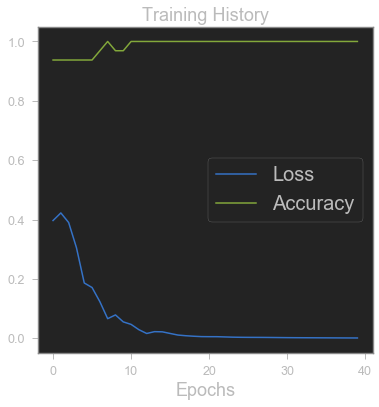

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot training epochs

fig, axes = plt.subplots(figsize=(6,6))

axes.plot(hist.history['loss'], label='Loss')
axes.plot(hist.history['accuracy'], label='Accuracy')

axes.set_title("Training History", fontsize=18)
axes.set_xlabel("Epochs", fontsize=18)
axes.legend(fontsize=20)

# Final accuracy
print ("Accuracy:", hist.history['accuracy'][-1])

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# convert form prediction to id
y_pred = classifier.predict(batchX)
y_pred = np.argmax(y_pred, axis=1) # argmax along axis 1

# convert from on-hot to original 
# (we could take the original)
y_true = np.argmax(batchy, axis=1) # argmax along axis 1

# compute confusion matrix
print ("Confusion Matrix")
print ( confusion_matrix(y_true, y_pred) )

# compute classification report
print ("Classification Report")
print ( classification_report(y_true, y_pred) )

Confusion Matrix
[[13  0  0]
 [ 0  9  0]
 [ 0  0 10]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        10

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [16]:
batchXt, batchyt = test_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(32, 256, 256, 3), min=0.000, max=1.000


In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# convert form prediction to id
y_pred = classifier.predict(batchXt)
y_pred = np.argmax(y_pred, axis=1) # argmax along axis 1

# convert from on-hot to original 
# (we could take the original)
y_true = np.argmax(batchyt, axis=1) # argmax along axis 1

# compute confusion matrix
print ("Confusion Matrix")
print ( confusion_matrix(y_true, y_pred) )

# compute classification report
print ("Classification Report")
print ( classification_report(y_true, y_pred) )

Confusion Matrix
[[11  0  1]
 [ 2  5  4]
 [ 0  0  9]]
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       1.00      0.45      0.62        11
           2       0.64      1.00      0.78         9

    accuracy                           0.78        32
   macro avg       0.83      0.79      0.76        32
weighted avg       0.84      0.78      0.76        32

